# Logistic Regression

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


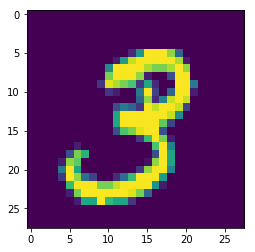

Label: [3] 

Training set:  55000
Test set:  10000
Validation set:  5000


In [2]:
# understanding the data
X = mnist.train.images[1] 
X = X.reshape((28,28))
plt.imshow(X)
plt.show()

print("Label:", np.where(mnist.train.labels[1]==1)[0], '\n')

# understanding the sets
print('Training set: ', len(mnist.train.images))
print('Test set: ', len(mnist.test.images))
print('Validation set: ', len(mnist.validation.images))

### Impletmenting regression

In [3]:

# we create a placeholder that can take a matrix of [any_size, 784]
x = tf.placeholder(tf.float32, [None, 784])

# there's one weight for each pixel
W = tf.Variable(tf.zeros([784, 10]))

# and one bias value for each class
b = tf.Variable(tf.zeros([10]))

# we define out model which is input times weights plus biases
y = tf.nn.softmax(tf.matmul(x, W) + b)

### Training the model


Cross entropy function:
$H_y'(y) = -\sum y'\log(y)$

In [19]:
# we create a placeholder to evaluate our model
y_ = tf.placeholder(tf.float32, [None, 10])

# we mutiply the result _y with it's logarigthm self and take the sum
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [23]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

yvalues = []

In [52]:
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run([train_step, cross_entropy] , feed_dict={x: batch_xs, y_: batch_ys})
    

[ 0.          0.          0.         ...,  0.          0.          0.25339332]
[ 0.          0.          0.         ...,  0.          0.          0.07660307]
[ 0.          0.          0.         ...,  0.          0.          0.12293226]
[ 0.         0.         0.        ...,  0.         0.         0.1353159]
[ 0.          0.          0.         ...,  0.          0.          0.34415779]
[ 0.          0.          0.         ...,  0.          0.          0.70797729]
[ 0.          0.          0.         ...,  0.          0.          0.30552328]
[ 0.          0.          0.         ...,  0.          0.          0.09578905]
[ 0.          0.          0.         ...,  0.          0.          0.45591152]
[ 0.          0.          0.         ...,  0.          0.          0.25619242]
[ 0.          0.          0.         ...,  0.          0.          0.20025373]
[ 0.         0.         0.        ...,  0.         0.         0.3398689]
[ 0.          0.          0.         ...,  0.          0.       

[ 0.          0.          0.         ...,  0.          0.          0.24805541]
[ 0.          0.          0.         ...,  0.          0.          0.42170888]
[ 0.          0.          0.         ...,  0.          0.          0.17229638]
[ 0.          0.          0.         ...,  0.          0.          0.17927757]
[ 0.          0.          0.         ...,  0.          0.          0.24025893]
[ 0.          0.          0.         ...,  0.          0.          0.28018713]
[ 0.        0.        0.       ...,  0.        0.        0.177654]
[ 0.          0.          0.         ...,  0.          0.          0.17481568]
[ 0.          0.          0.         ...,  0.          0.          0.22789741]
[ 0.          0.          0.         ...,  0.          0.          0.23607342]
[ 0.          0.          0.         ...,  0.          0.          0.37248766]
[ 0.          0.          0.         ...,  0.          0.          0.28156394]
[ 0.          0.          0.         ...,  0.          0.       

[ 0.         0.         0.        ...,  0.         0.         0.1957836]
[ 0.          0.          0.         ...,  0.          0.          0.17511418]
[ 0.          0.          0.         ...,  0.          0.          0.17872791]
[ 0.          0.          0.         ...,  0.          0.          0.26158249]
[ 0.          0.          0.         ...,  0.          0.          0.29669783]
[ 0.          0.          0.         ...,  0.          0.          0.32323837]
[ 0.          0.          0.         ...,  0.          0.          0.31607607]
[ 0.          0.          0.         ...,  0.          0.          0.12620327]
[ 0.          0.          0.         ...,  0.          0.          0.22267981]
[ 0.          0.          0.         ...,  0.          0.          0.27025443]
[ 0.          0.          0.         ...,  0.          0.          0.25416371]
[ 0.          0.          0.         ...,  0.          0.          0.40833828]
[ 0.          0.          0.         ...,  0.          0. 

[ 0.          0.          0.         ...,  0.          0.          0.31040758]
[ 0.          0.          0.         ...,  0.          0.          0.21483558]
[ 0.          0.          0.         ...,  0.          0.          0.10808077]
[ 0.          0.          0.         ...,  0.          0.          0.13865091]
[ 0.          0.          0.         ...,  0.          0.          0.17715347]
[ 0.          0.          0.         ...,  0.          0.          0.25055298]
[ 0.          0.          0.         ...,  0.          0.          0.40371001]
[ 0.          0.          0.         ...,  0.          0.          0.13702643]
[ 0.        0.        0.       ...,  0.        0.        0.150916]
[ 0.          0.          0.         ...,  0.          0.          0.41907841]
[ 0.          0.          0.         ...,  0.          0.          0.17933233]
[ 0.          0.          0.         ...,  0.          0.          0.19976518]
[ 0.          0.          0.         ...,  0.          0.       

[ 0.          0.          0.         ...,  0.          0.          0.22276007]
[ 0.          0.          0.         ...,  0.          0.          0.27117455]
[ 0.          0.          0.         ...,  0.          0.          0.25496858]
[ 0.          0.          0.         ...,  0.          0.          0.12341601]
[ 0.          0.          0.         ...,  0.          0.          0.41629392]
[ 0.          0.          0.         ...,  0.          0.          0.24865025]
[ 0.          0.          0.         ...,  0.          0.          0.19178009]
[ 0.          0.          0.         ...,  0.          0.          0.18955018]
[ 0.          0.          0.         ...,  0.          0.          0.18492433]
[ 0.          0.          0.         ...,  0.          0.          0.12191188]
[ 0.          0.          0.         ...,  0.          0.          0.25098851]
[ 0.         0.         0.        ...,  0.         0.         0.2640624]
[ 0.          0.          0.         ...,  0.          0. 

[ 0.          0.          0.         ...,  0.          0.          0.16500834]
[ 0.          0.          0.         ...,  0.          0.          0.23435688]
[ 0.          0.          0.         ...,  0.          0.          0.08462882]
[ 0.          0.          0.         ...,  0.          0.          0.25716248]
[ 0.          0.          0.         ...,  0.          0.          0.19383481]
[ 0.          0.          0.         ...,  0.          0.          0.19865388]
[ 0.          0.          0.         ...,  0.          0.          0.14495069]
[ 0.          0.          0.         ...,  0.          0.          0.23362045]
[ 0.          0.          0.         ...,  0.          0.          0.17463243]
[ 0.          0.          0.         ...,  0.          0.          0.29063961]
[ 0.          0.          0.         ...,  0.          0.          0.30022553]
[ 0.          0.          0.         ...,  0.          0.          0.23721552]
[ 0.          0.          0.         ...,  0.       

[ 0.          0.          0.         ...,  0.          0.          0.19207086]
[ 0.          0.          0.         ...,  0.          0.          0.27839768]
[ 0.          0.          0.         ...,  0.          0.          0.39860147]
[ 0.          0.          0.         ...,  0.          0.          0.26756433]
[ 0.          0.          0.         ...,  0.          0.          0.27509743]
[ 0.          0.          0.         ...,  0.          0.          0.32356533]
[ 0.          0.          0.         ...,  0.          0.          0.18803689]
[ 0.          0.          0.         ...,  0.          0.          0.38234162]
[ 0.          0.          0.         ...,  0.          0.          0.66657448]
[ 0.          0.          0.         ...,  0.          0.          0.31673101]
[ 0.          0.          0.         ...,  0.          0.          0.28393039]
[ 0.          0.          0.         ...,  0.          0.          0.16887496]
[ 0.          0.          0.         ...,  0.       

[ 0.          0.          0.         ...,  0.          0.          0.27961478]
[ 0.          0.          0.         ...,  0.          0.          0.29402024]
[ 0.         0.         0.        ...,  0.         0.         0.1415523]
[ 0.          0.          0.         ...,  0.          0.          0.37150896]
[ 0.          0.          0.         ...,  0.          0.          0.26327291]
[ 0.          0.          0.         ...,  0.          0.          0.30550143]
[ 0.          0.          0.         ...,  0.          0.          0.09794269]
[ 0.         0.         0.        ...,  0.         0.         0.4034147]
[ 0.          0.          0.         ...,  0.          0.          0.21243089]
[ 0.         0.         0.        ...,  0.         0.         0.2454544]
[ 0.          0.          0.         ...,  0.          0.          0.22803333]
[ 0.          0.          0.         ...,  0.          0.          0.28133956]
[ 0.          0.          0.         ...,  0.          0.          0.3

1000


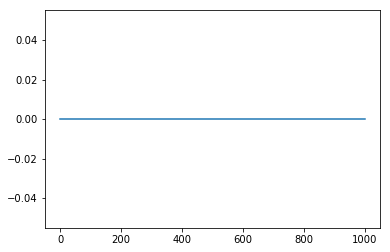

In [57]:
print(len(yvalues))

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

xvalues = np.arange(1000)
plt.plot(xvalues, yvalues)
plt.show()

In [22]:
print(cross_entropy.eval().shape())

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: Mean_2/_25 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_9_Mean_2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder', defined at:
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-c4017d1f39b0>", line 3, in <module>
    x = tf.placeholder(tf.float32, [None, 784])
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1507, in placeholder
    name=name)
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1997, in _placeholder
    name=name)
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: Mean_2/_25 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_9_Mean_2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


Digit 0


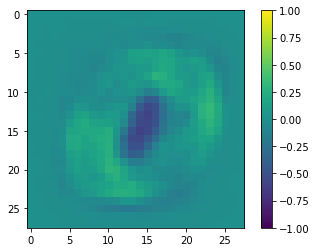

Digit 1


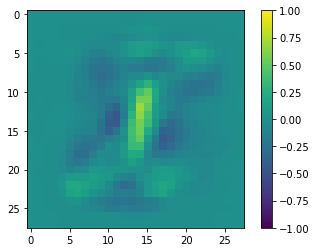

Digit 2


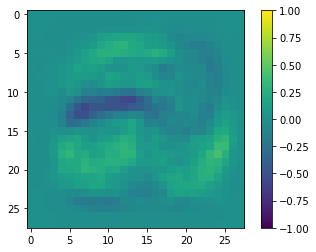

Digit 3


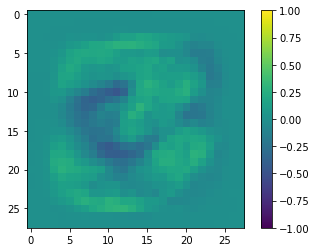

Digit 4


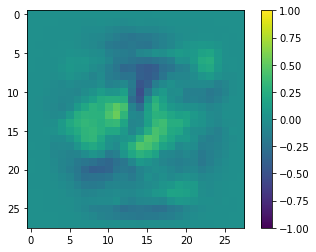

Digit 5


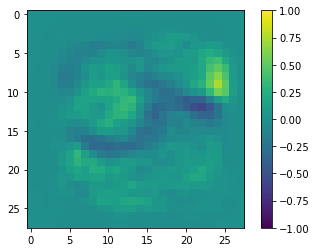

Digit 6


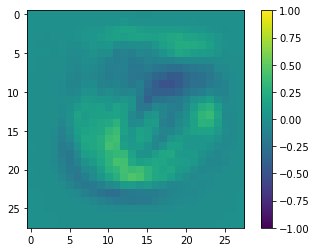

Digit 7


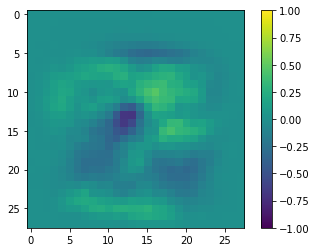

Digit 8


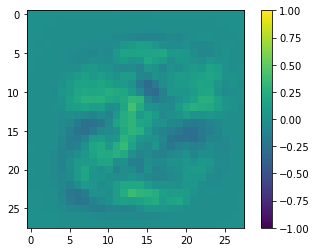

Digit 9


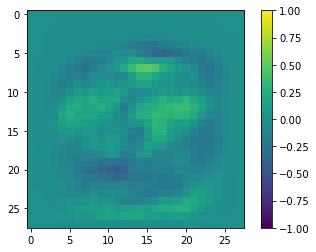

In [18]:
wts = W.eval(sess)
for i in range(0,10):
    im = wts.flatten()[i::10].reshape((28,-1))
    plt.imshow(im, clim=(-1.0, 1.0))
    plt.colorbar()
    print("Digit %d" % i)
    plt.show()